# Data Project - Stock Market Analysis 


In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

이 노트북에서는 주식 시장, 특히 일부 기술 주식의 데이터를 살펴볼 것입니다. 판다를 사용하여 주식 정보를 얻고, 다양한 측면을 시각화하는 방법을 배우고, 마지막으로 이전 실적 기록을 기반으로 주식의 위험을 분석하는 몇 가지 방법을 살펴볼 것입니다. 또한 장단기 기억 (LSTM) 방식을 통해 미래 주가를 예측할 것입니다!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

그 과정에서 다음 질문에 답할 것입니다.

    1.) 시간이 지남에 따라 주식 가격의 변화는 어땠습니까?
    2.) 주식의 일일 평균 수익률은 얼마입니까?
    3.) 다양한 주식의 이동 평균은 무엇입니까?
    4.) 다른 주식 간의 상관 관계는 무엇입니까?
    5.) 특정 주식에 투자함으로써 얼마나 많은 가치를 위험에 빠뜨리는가?
    6.) 미래의 주식 행동을 어떻게 예측할 수 있습니까? (LSTM을 활용 한 APPLE Inc의 종가 주가 예측)

# 1. What was the change in price of the stock overtime?
# 시간외 주식 가격 변동이란? 

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

이 섹션에서는 pandas로 주식 정보 요청을 처리하는 방법과 주식의 기본 속성을 분석하는 방법에 대해 설명합니다.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple


참고 : globals () 사용은 DataFrame 이름을 설정하는 조잡한 방법이지만 간단합니다.


Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

데이터에 대한 느낌을 얻기 위해 AAPL DataFrame을 사용해 보겠습니다.

In [4]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-20,3132.889893,3098.050049,3117.020020,3099.399902,3374400.0,3099.399902,AMAZON
2020-11-23,3139.750000,3065.459961,3116.699951,3098.389893,4708900.0,3098.389893,AMAZON
2020-11-24,3134.250000,3086.260010,3100.500000,3118.060059,3602100.0,3118.060059,AMAZON
2020-11-25,3198.000000,3140.260010,3141.870117,3185.070068,3790400.0,3185.070068,AMAZON
2020-11-27,3216.189941,3190.050049,3211.260010,3195.340088,2392900.0,3195.340088,AMAZON
2020-11-30,3228.389893,3125.550049,3208.479980,3168.040039,4063900.0,3168.040039,AMAZON
2020-12-01,3248.949951,3157.179932,3188.500000,3220.080078,4544400.0,3220.080078,AMAZON
2020-12-02,3232.000000,3173.260010,3221.649902,3203.530029,3129300.0,3203.530029,AMAZON
2020-12-03,3228.639893,3181.310059,3205.459961,3186.729980,2892000.0,3186.729980,AMAZON


In [6]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,92.516557,89.903085,91.181568,91.279514,1.487277e+08,90.693090
std,20.974359,20.346263,20.851465,20.628954,7.846922e+07,20.986529
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.106247,72.252502,73.685625,73.440622,1.019491e+08,72.361727
50%,84.901249,82.416252,82.798752,83.669998,1.345164e+08,83.375568
75%,115.560001,112.275000,114.042501,113.863123,1.848412e+08,113.588758
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-06 to 2020-12-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


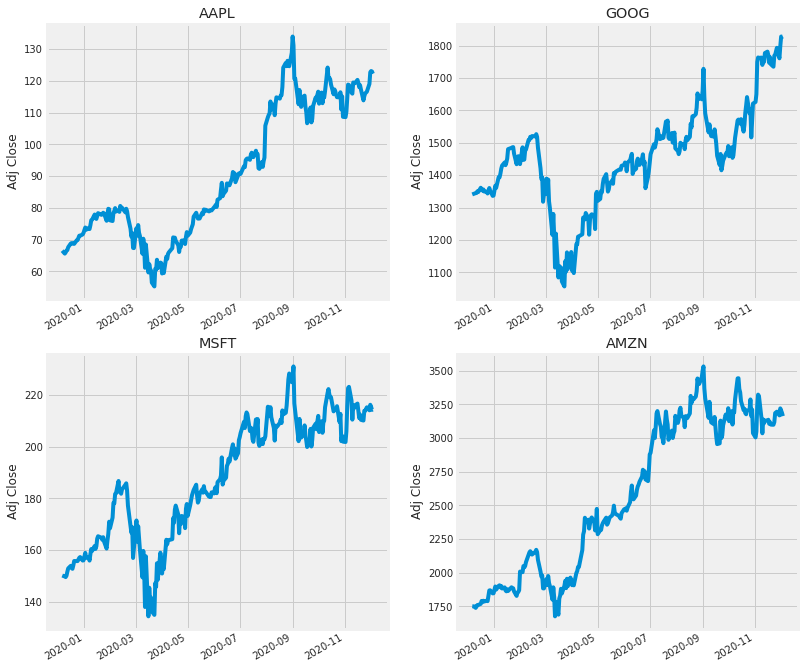

In [8]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

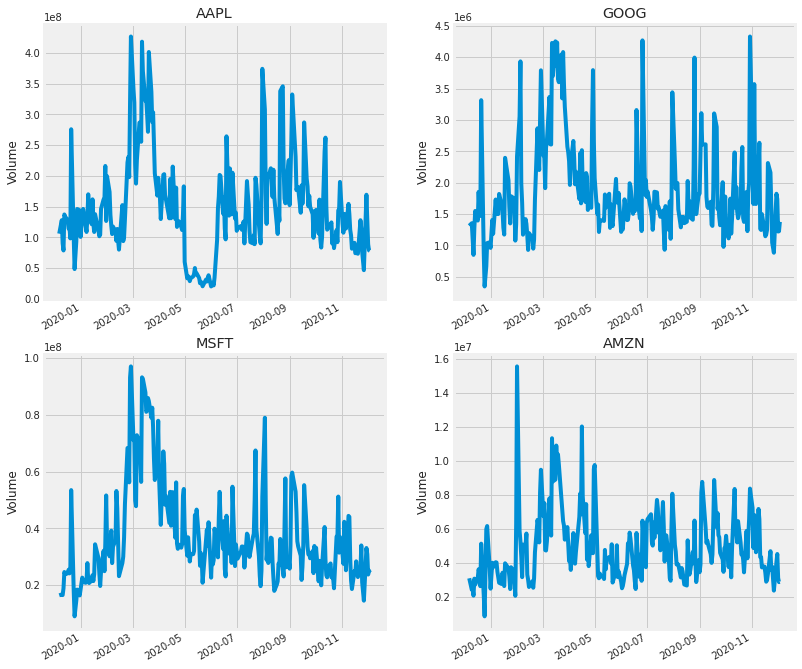

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

이제 종가와 매일 거래되는 거래량에 대한 시각화를 보았으므로 계속해서 주식의 이동 평균을 계산해 보겠습니다.

# 2. What was the moving average of the various stocks?
# 2. 다양한 주식의 이동 평균은 무엇입니까?

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [11]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

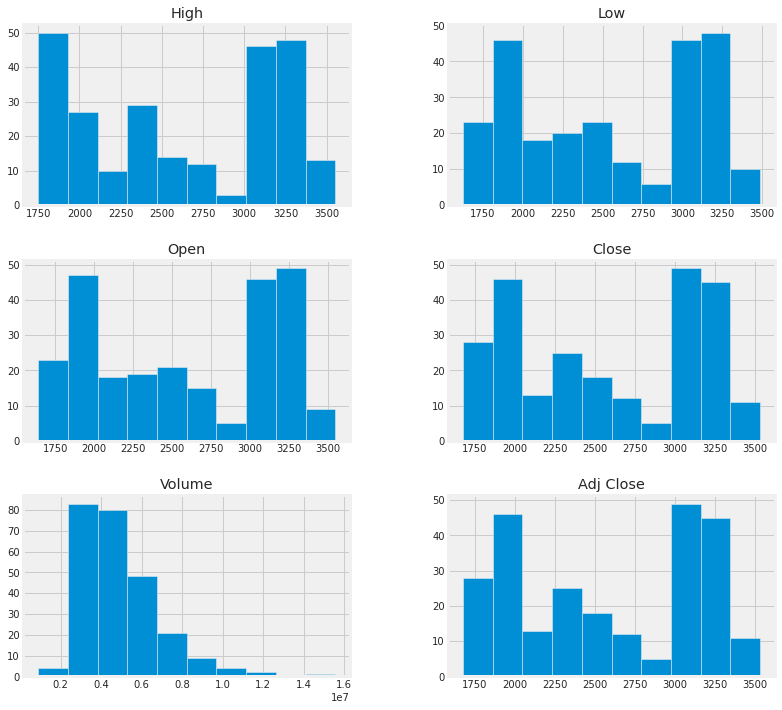

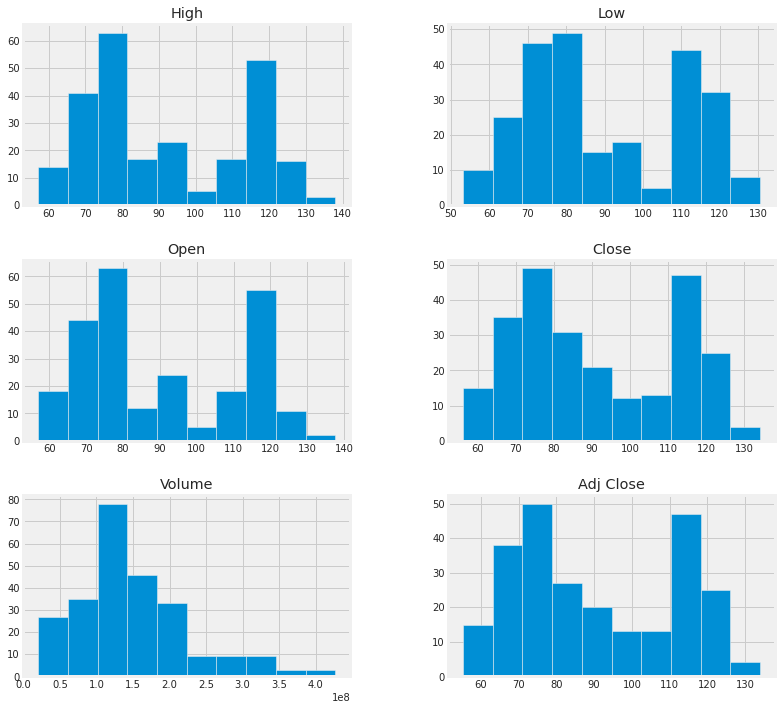

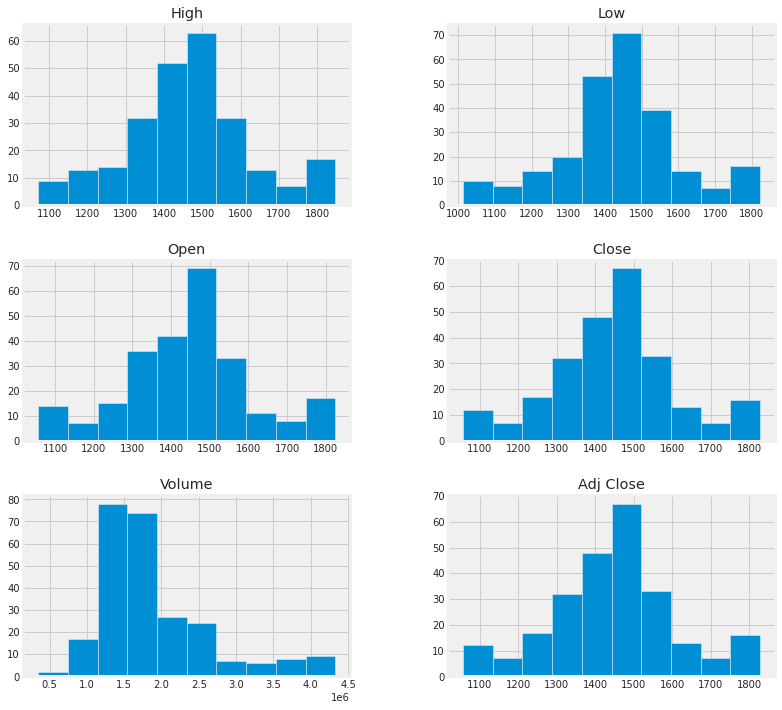

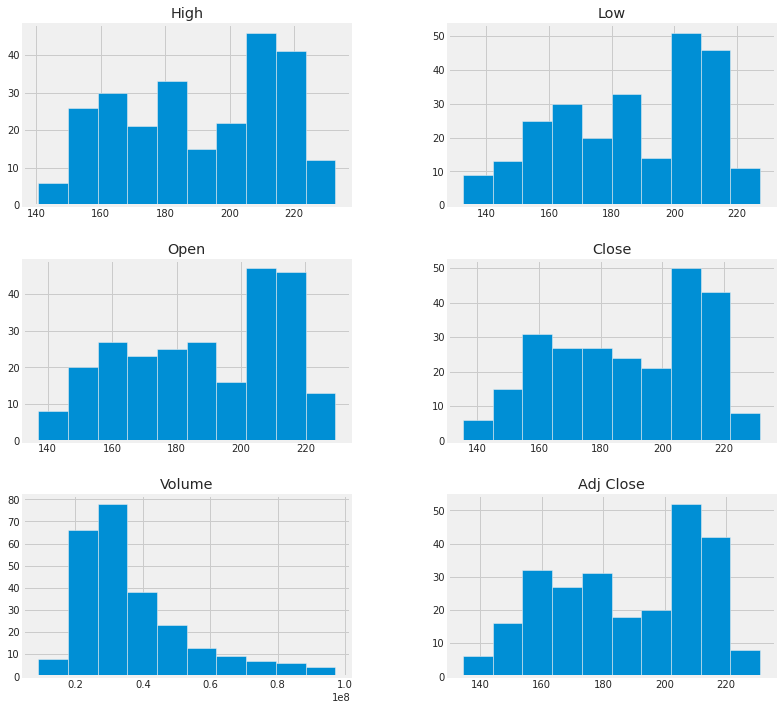

In [12]:
df.groupby("company_name").hist(figsize=(12, 12));

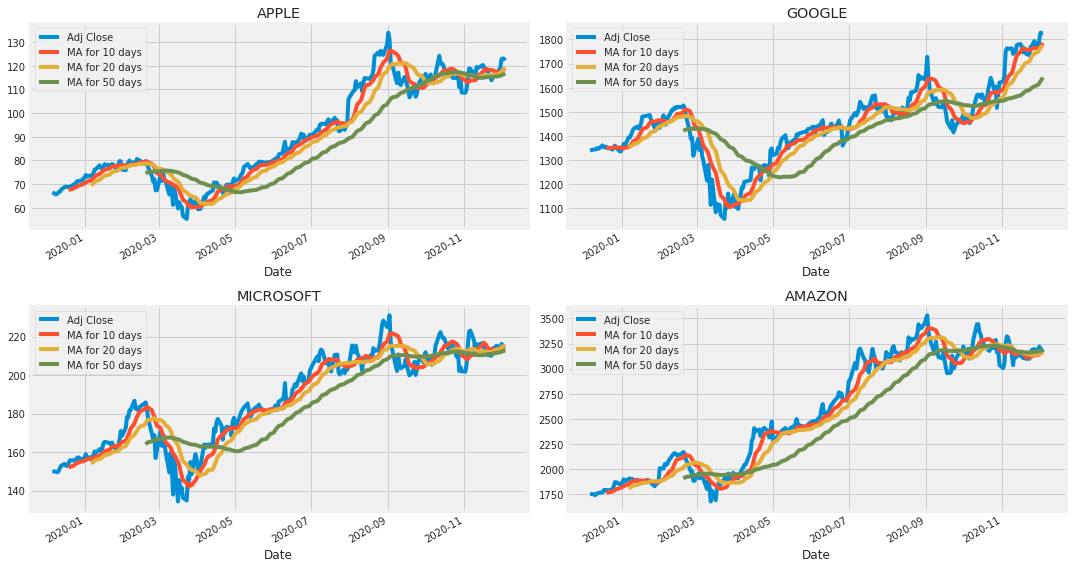

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

# 3. 주식의 일일 평균 수익률은 얼마입니까?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

기준 분석을 완료 했으므로 이제 좀 더 자세히 살펴 보겠습니다. 이제 주식의 위험을 분석 할 것입니다. 그러기 위해서는 주식의 절대 가치뿐만 아니라 일일 주식 변동을 면밀히 살펴 봐야합니다. 계속해서 pandas를 사용하여 Apple 주식에 대한 일일 수익률을 검색해 보겠습니다.

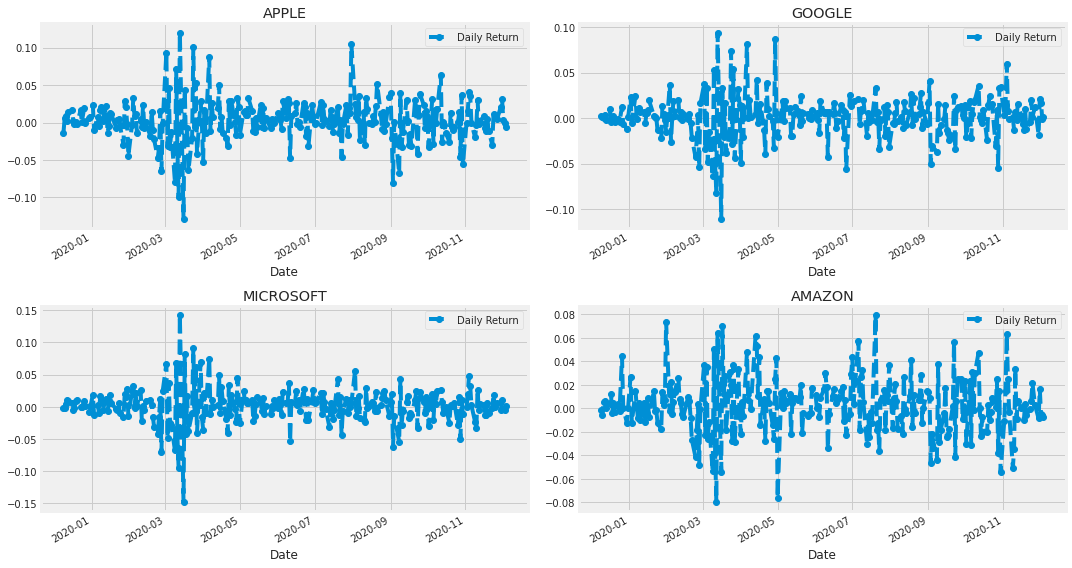

In [20]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
# plt.subplots는 그래프를 한번에 그리기
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

이제 히스토그램을 사용하여 평균 일일 수익을 전반적으로 살펴 보겠습니다. seaborn을 사용하여 동일한 그림에 히스토그램과 kde 플롯을 모두 생성합니다.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

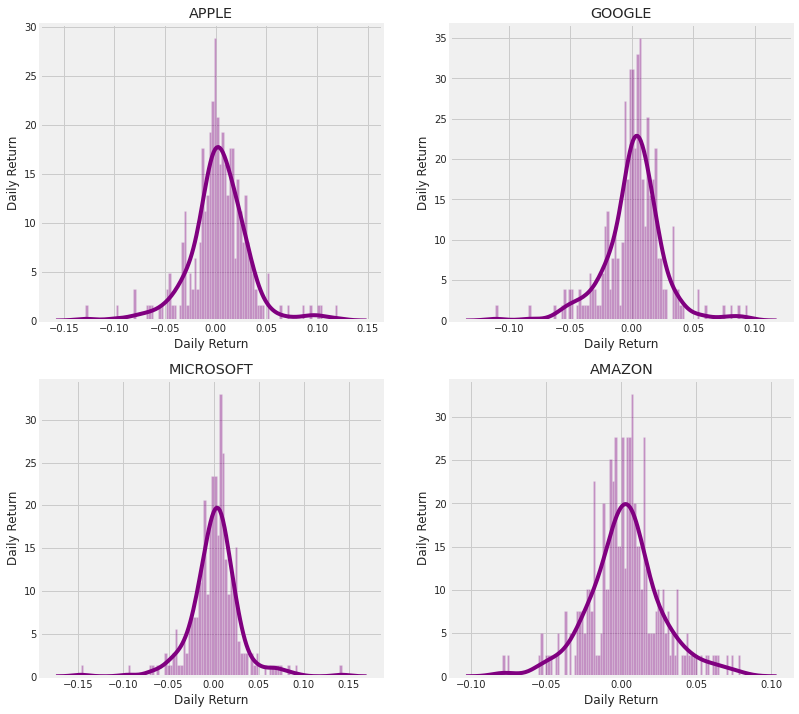

In [21]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
# 여기서 dropna ()를 사용하지 않으면 NaN 값을 seaborn에서 읽을 수 없습니다.
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?
# 4. 종가가 서로 다른 주식의 상관 관계는 무엇입니까?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

이제 목록에있는 모든 주식의 수익률을 분석하려면 어떻게해야합니까? 계속해서 각 주식 데이터 프레임에 대한 모든 [ 'Close'] 열이있는 DataFrame을 빌드 해 보겠습니다.

In [24]:
# Grab all the closing prices for the tech stock list into one DataFrame
# 아래는 오늘부터 1년 전까지의 영업일 별 종가 긁어온다.
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-06,66.553131,1340.619995,150.159271,1751.599976
2019-12-09,65.621384,1343.560059,149.773361,1749.510010
2019-12-10,66.004898,1344.660034,149.545792,1739.209961
2019-12-11,66.567886,1345.020020,150.109772,1748.719971
2019-12-12,66.737518,1350.270020,151.633667,1760.329956


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

이제 우리는 모든 종가를 얻었으므로 Apple 주식에 대해했던 것처럼 모든 주식에 대한 일일 수익을 얻습니다.

In [25]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-06,NaN,NaN,NaN,NaN
2019-12-09,-0.014000,0.002193,-0.002570,-0.001193
2019-12-10,0.005844,0.000819,-0.001519,-0.005887
2019-12-11,0.008529,0.000268,0.003771,0.005468
2019-12-12,0.002548,0.003903,0.010152,0.006639


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself

이제 두 주식의 일일 수익률을 비교하여 상관 관계를 확인할 수 있습니다. 먼저 자신과 비교 한 주식을 봅시다..

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


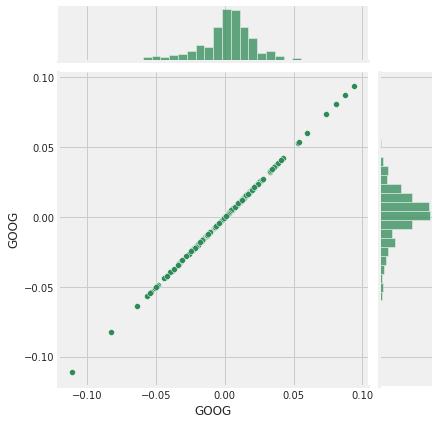

In [26]:
# Comparing Google to itself should show a perfectly linear relationship
# jointplot은 두개의 수치형 변수 간의 관계를 연구할 수 있음.
# sns.jointplot는 각 축별 히스토그램을 볼 수 있다.

sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


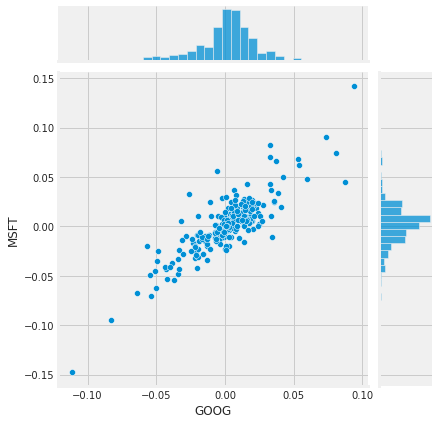

In [27]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

따라서 이제 두 주식이 서로 완벽하게 (그리고 양수 적으로) 상관 관계가 있다면 일일 수익률 사이에 선형 관계가 발생해야한다는 것을 알 수 있습니다.

Seaborn과 pandas를 사용하면 기술 주식 시세 목록에있는 모든 가능한 주식 조합에 대해이 비교 분석을 매우 쉽게 반복 할 수 있습니다. sns.pairplot ()을 사용하여이 플롯을 자동으로 생성 할 수 있습니다.

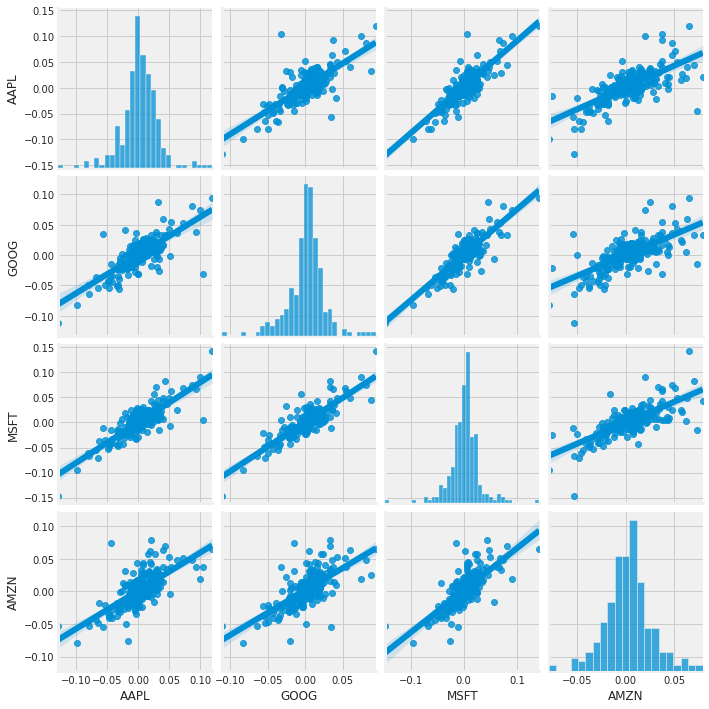

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
# kind='reg'하면 회귀선 그래프 중신으로 그리는 방법임
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.


위에서 우리는 모든 주식 간의 일일 수익률에 대한 모든 관계를 볼 수 있습니다. 한눈에 Google과 Amazon 일일 수익 간의 흥미로운 상관 관계를 보여줍니다. 그 개인 동수 인을 조사하는 것은 흥미로울 것입니다. sns.pairplot () 호출의 단순성은 환상적이지만, 대각선, 위쪽 삼각형 및 아래쪽 삼각형에 어떤 종류의 플롯이 있는지를 포함하여 그림을 완전히 제어하기 위해 sns.PairGrid ()를 사용할 수도 있습니다. 다음은이 결과를 달성하기 위해 seaborn의 모든 기능을 활용하는 예입니다.

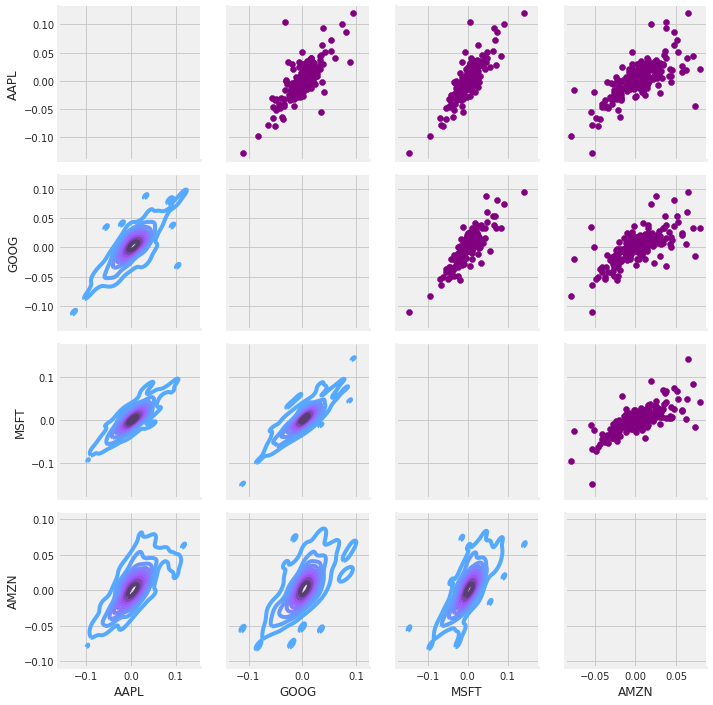

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

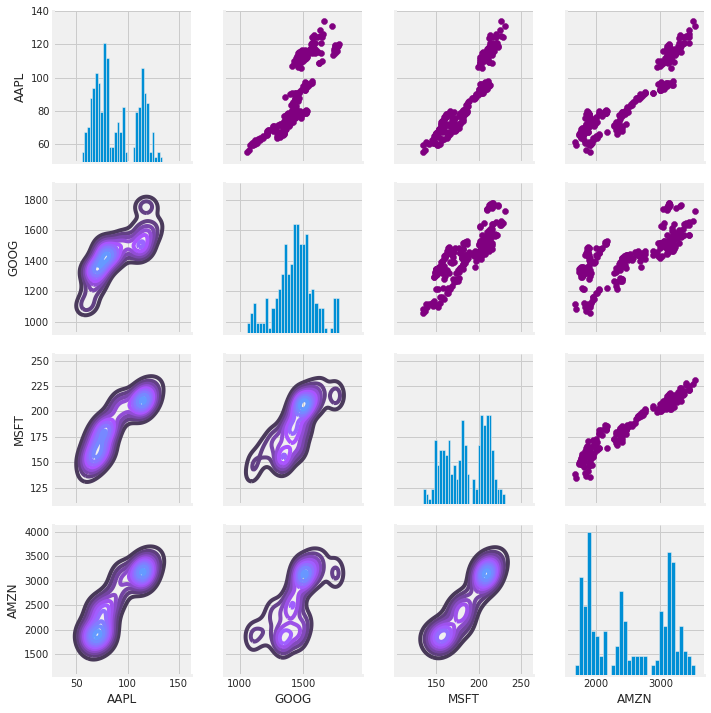

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

마지막으로, 주식의 일일 수익률 간의 상관 관계에 대한 실제 수치를 얻기 위해 상관 관계 플롯을 수행 할 수도 있습니다. 종가를 비교하면 Microsoft와 Apple 간의 흥미로운 관계를 알 수 있습니다.

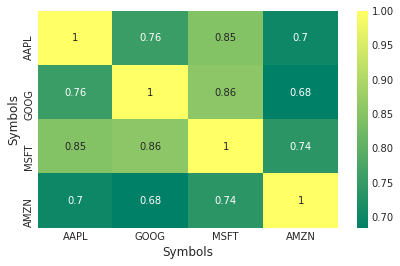

In [30]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

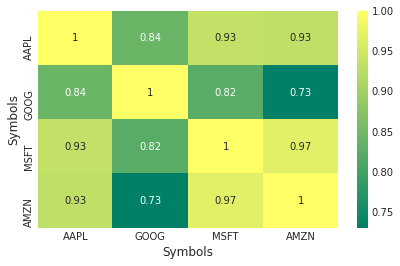

In [31]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

환상적입니다! PairPlot에서 의심했던 것처럼 Microsoft와 Amazon이 일일 주식 수익률의 가장 강한 상관 관계를 가지고 있다는 것을 수치 및 시각적으로 볼 수 있습니다. 또한 모든 기술 회사가 양의 상관 관계를 가지고 있다는 것도 흥미 롭습니다.

# 5. How much value do we put at risk by investing in a particular stock?
# 5. 특정 주식에 투자함으로써 얼마나 많은 가치를 위험에 빠뜨리나요?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

위험을 정량화 할 수있는 방법은 여러 가지가 있습니다. 일일 수익률에 대해 수집 한 정보를 사용하는 가장 기본적인 방법 중 하나는 예상 수익률을 일일 수익률의 표준 편차와 비교하는 것입니다.

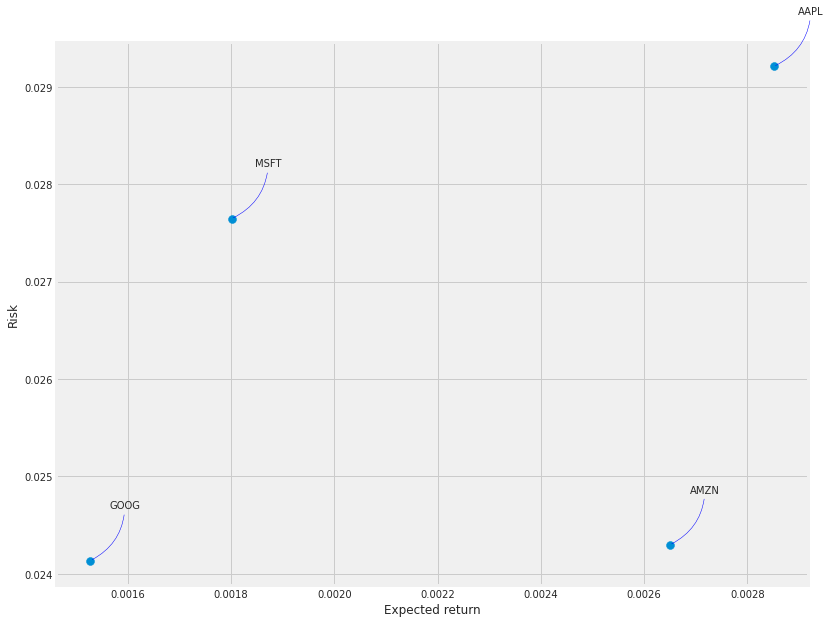

In [33]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
# tech_rets에는 일일 수익률이 들어있음
rets = tech_rets.dropna()
# pi는 파이
area = np.pi*20
# std() 표준편차

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# zip 함수는 동일한 개수로 이루어진 자료형을 묶어 주는 역할
# plt.annotate는 글자를 그림에 표기해줌(주석같은 역할)
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:


# 6. Apple Inc의 종가 주가 예측 :

In [34]:
#Get the stock quote
# APPLE 주식 시세 받아옴.
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2020-11-30,120.970001,116.809998,116.970001,119.050003,169410200.0,119.050003
2020-12-01,123.470001,120.010002,121.010002,122.720001,128166800.0,122.720001
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,123.080002


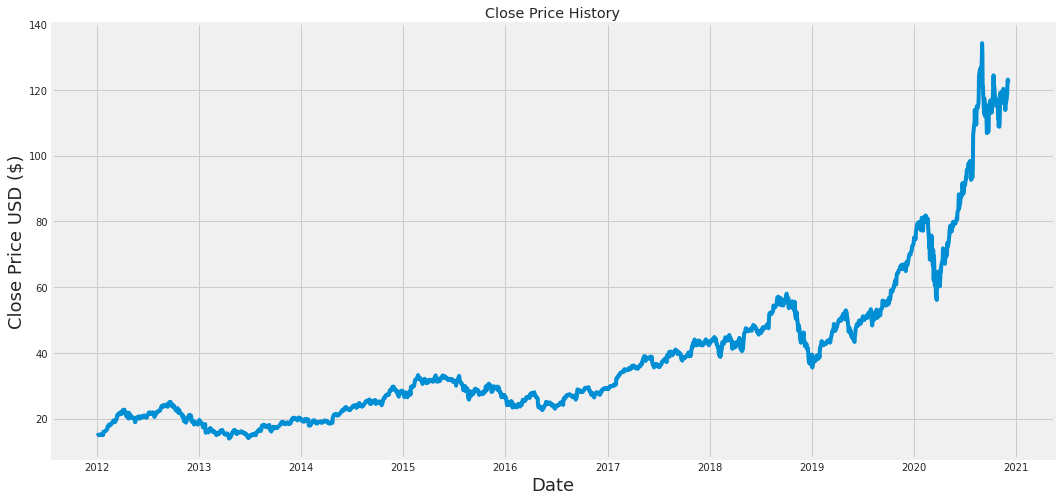

In [35]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [43]:
#Create a new dataframe with only the 'Close column
# filter() : 원하는 데이터만 가져오기
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
#np.ceil()) :  각 원소 값보다 크거나 같은 가장 작은 정수 값 (천장 값)으로 올림
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1798

In [44]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.90767894],
       [0.90651454],
       [0.90077564]])

In [45]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [46]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1738/1738 [==============================] - 35s 20ms/step - loss: 3.3682e-04


In [47]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.488714757322287

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


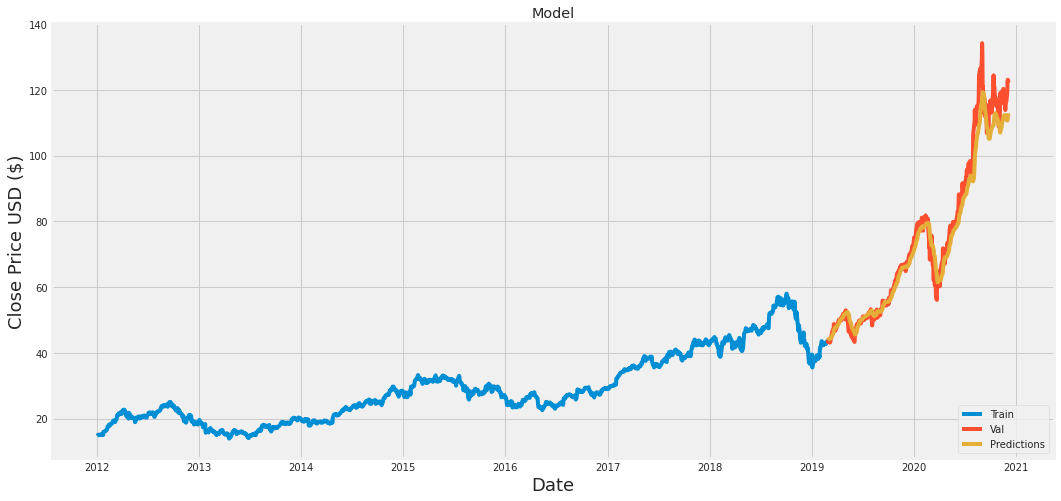

In [48]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-02-27,43.717499,43.891148
2019-02-28,43.287498,44.022762
2019-03-01,43.742500,44.107849
2019-03-04,43.962502,44.202534
2019-03-05,43.882500,44.313347
...,...,...
2020-11-30,119.050003,110.646461
2020-12-01,122.720001,110.734062
2020-12-02,123.080002,111.304741
